In [17]:
!pip install biopython
!wget https://github.com/rcedgar/muscle/releases/download/v5.1/muscle5.1.linux_intel64 -O muscle
!chmod +x muscle

--2025-08-02 18:07:23--  https://github.com/rcedgar/muscle/releases/download/v5.1/muscle5.1.linux_intel64
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/378508080/254b2e72-f483-4c7c-b666-f70376afa329?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-02T18%3A44%3A31Z&rscd=attachment%3B+filename%3Dmuscle5.1.linux_intel64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-02T17%3A44%3A27Z&ske=2025-08-02T18%3A44%3A31Z&sks=b&skv=2018-11-09&sig=2Nlhh%2BnMUqbCxHUwdZTyg0Aq7tD0xpiEB9omFloBVMc%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NDE1ODM0NCwibmJmIjoxNzU0MTU4MDQ0LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHV

In [18]:
import os
import subprocess

from Bio import AlignIO
from Bio import pairwise2
from Bio import SeqIO
from Bio.Align import AlignInfo
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

In [19]:
uploaded = files.upload()

for file in uploaded.keys():
    print(f"File sent: {file}")

Saving PAM250.txt to PAM250 (1).txt
Saving proteins.fasta to proteins (1).fasta
File sent: PAM250 (1).txt
File sent: proteins (1).fasta


In [21]:
sequences = list(SeqIO.parse("proteins.fasta", "fasta"))
print(f"{len(sequences)} sequences were successfully reloaded.")

7 sequences were successfully reloaded.


In [22]:
for seq_record in sequences:
    print(f"ID: {seq_record.id}")
    print(f"Description: {seq_record.description}")
    print(f"Sequence size: {len(seq_record.seq)} aminoácidos")
    print(f"Sequence (start): {seq_record.seq[:30]}...\n")

ID: human-kiss1
Description: human-kiss1 NP_002247.3| metastasis-suppressor KiSS-1 [Homo sapiens]
Sequence size: 138 aminoácidos
Sequence (start): MNSLVSWQLLLFLCATHFGEPLEKVASVGN...

ID: mouse-kiss1
Description: mouse-kiss1 NP_839991.2| metastasis-suppressor KiSS-1 [Mus musculus]
Sequence size: 126 aminoácidos
Sequence (start): MISMASWQLLLLLCVATYGEPLAKVKPGST...

ID: zebrafish-kiss1
Description: zebrafish-kiss1 NP_001106961.1| KiSS-1 metastasis-suppressor [Danio rerio]
Sequence size: 116 aminoácidos
Sequence (start): MMLLTVILMLSVARVHTNPSGHFQYYLEDE...

ID: frog-kiss1
Description: frog-kiss1 NP_001156331.1| kisspeptin [Xenopus (Silurana) tropicalis]
Sequence size: 129 aminoácidos
Sequence (start): MSSLCLFLFLLGIHLGRSDHTAKNTDELYS...

ID: opposum-kiss1
Description: opposum-kiss1 NP_001137604.1| KiSS-1 [Monodelphis domestica]
Sequence size: 149 aminoácidos
Sequence (start): MRSSVYWQLLLLLSVSPFGETSDKFAPVEN...

ID: zebrafish-kiss2
Description: zebrafish-kiss2 NP_001136057.1| kisspeptin 2 [Danio r

In [23]:
output_file = "aligned_proteins.fasta"
result = subprocess.run(["./muscle", "-align", "proteins.fasta", "-output", output_file],
                        stdout=subprocess.PIPE,
                        stderr=subprocess.PIPE,
                        text=True)

if result.returncode == 0:
    print("Multiple alignment successfully performed.")
else:
    print("Alignment error:")
    print(result.stderr)


Multiple alignment successfully performed.


In [24]:
alignment = AlignIO.read("aligned_proteins.fasta", "fasta")

print(f"Number of aligned sequences: {len(alignment)}")
print(f"Alignment length: {alignment.get_alignment_length()}")

for record in alignment:
    print(f"{record.id}: {record.seq[:60]}...")

Number of aligned sequences: 7
Alignment length: 214
zebrafish-kiss2: MNTRA---LILFMS-AMVSQST-------------AMRAI--------------------...
frog-kiss2: MLLLL---LLTLVISQHAVGGT----------MFRGDEE-G-----------------LE...
zebrafish-kiss1: MMLLT---VILMLS-VARVHT-----------NPSGHFQYY-----------------LE...
frog-kiss1: MSSLC---LFLFLL-GIHLGRS----------DHTAKNTDE-----------------LY...
human-kiss1: MNSLVSWQLLLFLC-ATHFGEPLEKVASVGNSRPTGQQLES-----------------LG...
mouse-kiss1: MISMASWQLLLLLC-VATYGEPLAKVK----PGSTGQQSGP-----------------QE...
opposum-kiss1: MRSSVYWQLLLLLS-VSPFGETSDKFAPVENPGRTGTSSLSQEASSSDFSALGQPGRLLA...


In [25]:
summary_align = AlignInfo.SummaryInfo(alignment)
consensus = summary_align.dumb_consensus(threshold=0.7, ambiguous='X')

print("Consensus line (70%):")
print(consensus[:100])

Consensus line (70%):
MXXXXXWQLXLXLXSXXXXGXXXXKXXXVXNXXXXGXXXXXQEASSSDFSALGQPGRLLXXXXPGKSXWEXXXXCXEXXPXXRRAEQMPVXXXXXXXXXX


/usr/local/lib/python3.11/dist-packages/Bio/Align/AlignInfo.py:62: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecord(Seq('ATGT')),
...   

In [26]:
def calculate_identity(seq1, seq2):
    matches = sum(a == b for a, b in zip(seq1, seq2) if a != '-' and b != '-')
    length = sum(1 for a, b in zip(seq1, seq2) if a != '-' and b != '-')
    return round((matches / length) * 100, 2) if length > 0 else 0.0

labels = [record.id for record in alignment]
n = len(alignment)
identity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        identity_matrix[i][j] = calculate_identity(alignment[i].seq, alignment[j].seq)

df_identity = pd.DataFrame(identity_matrix, index=labels, columns=labels)
df_identity

,zebrafish-kiss2,frog-kiss2,zebrafish-kiss1,frog-kiss1,human-kiss1,mouse-kiss1,opposum-kiss1
zebrafish-kiss2,100.00,33.33,24.18,21.95,27.59,25.00,24.10
frog-kiss2,33.33,100.00,30.10,20.65,24.24,23.91,25.26
zebrafish-kiss1,24.18,30.10,100.00,26.21,27.27,26.21,27.36
frog-kiss1,21.95,20.65,26.21,100.00,43.59,36.61,37.72
human-kiss1,27.59,24.24,27.27,43.59,100.00,52.38,47.73
mouse-kiss1,25.00,23.91,26.21,36.61,52.38,100.00,48.80
opposum-kiss1,24.10,25.26,27.36,37.72,47.73,48.80,100.00


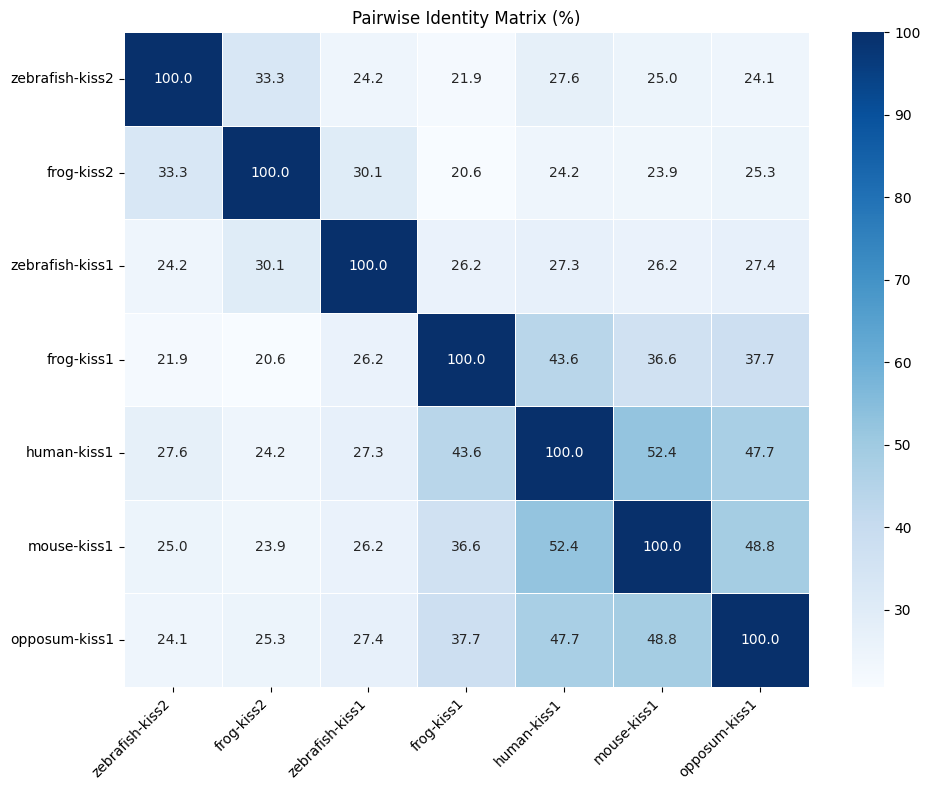

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_identity, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Pairwise Identity Matrix (%)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

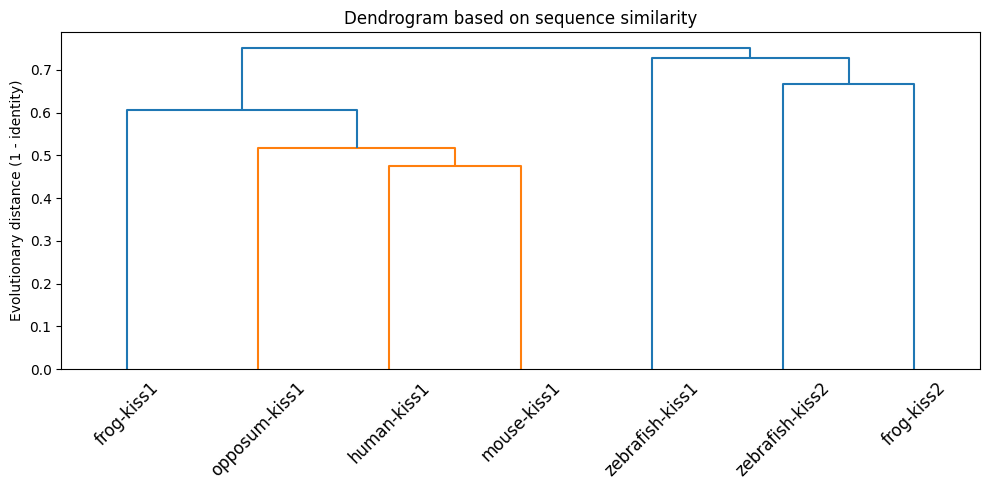

In [28]:
distance_matrix = 1 - (identity_matrix / 100)
linked = linkage(squareform(distance_matrix), method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=labels, leaf_rotation=45)
plt.title("Dendrogram based on sequence similarity")
plt.ylabel("Evolutionary distance (1 - identity)")
plt.tight_layout()
plt.show()

In [29]:
grupos = fcluster(linked, 0.6, criterion='distance')

for label, grupo in zip(labels, grupos):
    print(f"{label}: Grupo {grupo}")

zebrafish-kiss2: Grupo 3
frog-kiss2: Grupo 4
zebrafish-kiss1: Grupo 5
frog-kiss1: Grupo 2
human-kiss1: Grupo 1
mouse-kiss1: Grupo 1
opposum-kiss1: Grupo 1
